The below study compares the performance of Capomulin treatment with other treatment regimens.  Throughout the analysis, two of the treatments stood out, the Capomulin and Ramicane regimens performed significantly better than others. The summary statistics table shows that the average and median tumour volume of those treatments were considerably smaller comparing to others. Both treatments had the lowest variance and standard deviation, which indicates that the values were the least spread from their means and the most precise. 

Similarly, the box plot presenting final tumour volume for four regimens (Capomulin, Ramicane, Ifubinol, Ceftamin) shows that Capomulin and Ramicane finished the study with the lowest final tumour size. The only outlier was for the Infubinol treatment.

The bar plot displaying the total number of timepoints for each treatment regimen shows that Capomulin and Ramicane collected the most measurements. Both treatments gathered around 250 timepoints each. The Propriva treatment collected only around 150 measurements, while the rest of the regimens averaged at around 175.

The linear regression model for Capomulin shows a positive correlation between the average size of tumour and the weight of the mice.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df=pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df)

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned=merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep = False)
cleaned.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice in the clean DataFrame.
len(cleaned)

1883

In [5]:
cleaned.groupby("Drug Regimen")

In [6]:
#Calcualting the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean=cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median=cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance=cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev=cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem=cleaned.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

In [7]:
#building dataframe to display summary statistics
summary=pd.DataFrame({"Mean Tumor Volume": mean,
                     "Median Tumor Volume":median,
                     "Tumor Volume Variance":variance,
                      "Tumor Volume Standard Dev": std_dev,
                     "Tumor Volume Std. Err.":sem})
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#Finding values for x and y axis
#drug will be the x_axis and timepoint_count will be y_axis
drug=cleaned["Drug Regimen"].unique().tolist()
timepoint_count=cleaned.groupby("Drug Regimen")["Timepoint"].count()
df=pd.DataFrame(timepoint_count)

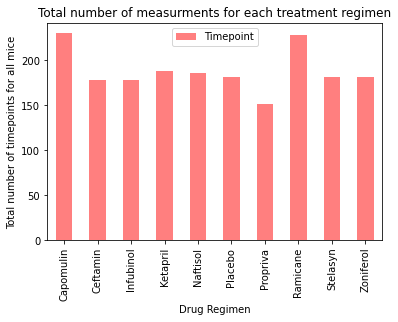

<Figure size 432x288 with 0 Axes>

In [9]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mice_chart=df.plot(kind="bar", title = "Total number of measurments for each treatment regimen", color = "r", alpha =0.5)
mice_chart.set_xlabel("Drug Regimen")
mice_chart.set_ylabel("Total number of timepoints for all mice")
plt.show()
plt.tight_layout()

([<matplotlib.axis.XTick at 0x1b026953c40>,
 [Text(0.0, 0, 'Ramicane'),
  Text(1.0, 0, 'Capomulin'),
  Text(2.0, 0, 'Infubinol'),
  Text(3.0, 0, 'Placebo'),
  Text(4.0, 0, 'Ceftamin'),
  Text(5.0, 0, 'Stelasyn'),
  Text(6.0, 0, 'Zoniferol'),
  Text(7.0, 0, 'Ketapril'),
  Text(8.0, 0, 'Propriva'),
  Text(9.0, 0, 'Naftisol')])

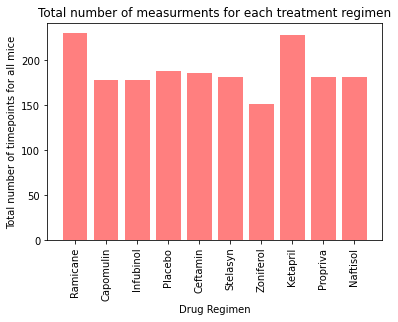

In [10]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(drug, timepoint_count, color="r", alpha=0.5, align="center")
#labeling the chart
plt.title("Total number of measurments for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of timepoints for all mice")
tick_locations = [value for value in drug]
plt.xticks(tick_locations, drug, rotation="vertical")

Text(0, 0.5, 'Gender')

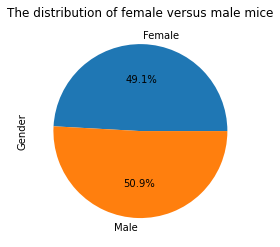

In [11]:
# Generating a pie plot showing the distribution of female versus male mice using Pandas
gender_pie=cleaned.groupby("Sex")["Mouse ID"].count().plot(kind="pie", y="Sex", 
                                                           title="The distribution of female versus male mice",
                                                           autopct="%1.1f%%")
gender_pie.set_ylabel("Gender")

Text(0.5, 1.0, 'The distribution of female versus male mice')

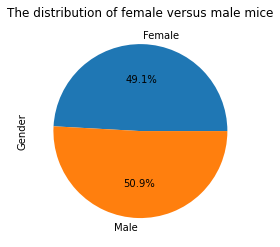

In [12]:
# Generating a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
plt.pie(cleaned.groupby("Sex")["Mouse ID"].count(),labels=labels,autopct="%1.1f%%")
plt.ylabel("Gender")
plt.title("The distribution of female versus male mice")

In [13]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drug_regimen=cleaned.set_index("Drug Regimen").loc[treatment,:].drop_duplicates(subset=["Mouse ID"], keep = "last")
Capomulin=drug_regimen.loc["Capomulin","Tumor Volume (mm3)"]
Ramicane=drug_regimen.loc["Ramicane","Tumor Volume (mm3)"]
Infubinol=drug_regimen.loc["Infubinol","Tumor Volume (mm3)"]
Ceftamin=drug_regimen.loc["Ceftamin","Tumor Volume (mm3)"]

In [14]:
#Calculating the quartiles and IQR and looking for outliers for Capomulin
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The quartiles are: {quartiles}")
print(f"The interquartile range is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The quartiles are: 0.25    32.377357
0.50    38.125164
0.75    40.159220
Name: Tumor Volume (mm3), dtype: float64
The interquartile range is: 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [15]:
#Calculating the quartiles and IQR and looking for outliers for Ramicane
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The quartiles are: {quartiles}")
print(f"The interquartile range is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The quartiles are: 0.25    31.560470
0.50    36.561652
0.75    40.659006
Name: Tumor Volume (mm3), dtype: float64
The interquartile range is: 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [16]:
#Calculating the quartiles and IQR and looking for outliers for Infubinol
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The quartiles are: {quartiles}")
print(f"The interquartile range is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The quartiles are: 0.25    54.048608
0.50    60.165180
0.75    65.525743
Name: Tumor Volume (mm3), dtype: float64
The interquartile range is: 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [17]:
#Calculating the quartiles and IQR and looking for outliers for Ceftamin
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"The quartiles are: {quartiles}")
print(f"The interquartile range is: {iqr}")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The quartiles are: 0.25    48.722078
0.50    59.851956
0.75    64.299830
Name: Tumor Volume (mm3), dtype: float64
The interquartile range is: 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


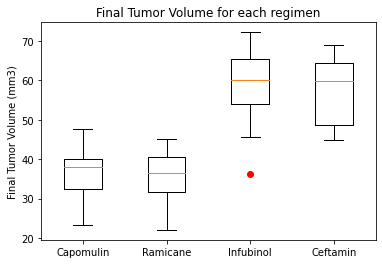

In [18]:
fig1, ax1 = plt.subplots()
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot([Capomulin, Ramicane, Infubinol, Ceftamin], sym="r")
plt.xticks([1, 2, 3,4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final Tumor Volume for each regimen")
plt.show()

In [19]:
#Displaying all the data for mice treated with Capomulin
drug_regimen.loc["Capomulin"]

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,s185,Female,3,17,45,23.343598,1
Capomulin,x401,Female,16,15,45,28.484033,0
Capomulin,m601,Male,22,17,45,28.430964,1
Capomulin,f966,Male,16,17,20,30.485985,0
Capomulin,u364,Male,18,17,45,31.023923,3
Capomulin,y793,Male,17,17,45,31.896238,2
Capomulin,r554,Female,8,17,45,32.377357,3
Capomulin,m957,Female,3,19,45,33.329098,1
Capomulin,t565,Female,20,17,45,34.455298,0


Text(0.5, 1.0, 'Capomulin treatment of mouse u364')

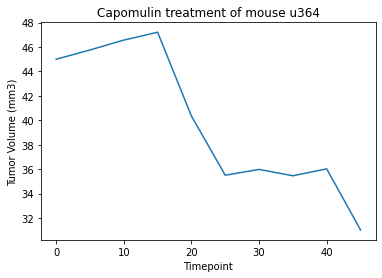

In [20]:
#selecting mouse ID "u364"
mouse_id="u364"
#Displaying data for mouse "u364"
mouse_data=cleaned.set_index("Mouse ID").loc[mouse_id][["Timepoint","Tumor Volume (mm3)"]]
#Generating a line plot of tumor volume vs. time point for mouse "u364"
x_axis=mouse_data["Timepoint"]
y_axis=mouse_data["Tumor Volume (mm3)"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse u364")

Text(0.5, 1.0, 'Avg tumor volume versus mouse weight for the Capomulin treatment regimen')

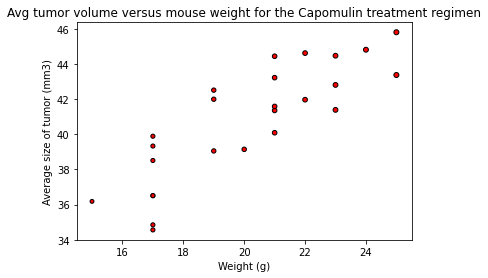

In [22]:
#Finding weight of mice treated with Capomulin
#Calculating average size of tumor for each mice
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_data=cleaned.set_index("Drug Regimen").loc["Capomulin"]
avg_tumor=weight_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mice_size=drug_regimen.loc["Capomulin"].set_index("Mouse ID")["Weight (g)"]
merge_mice=pd.merge(mice_size,avg_tumor, on="Mouse ID")
tumor_data=merge_mice["Tumor Volume (mm3)"]
weight_axis=merge_mice["Weight (g)"]
plt.scatter(weight_axis,tumor_data, marker="o",facecolors="red", edgecolors="black", s=weight_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average size of tumor (mm3)")
plt.title("Avg tumor volume versus mouse weight for the Capomulin treatment regimen")

The correlation between both factors is 0.84


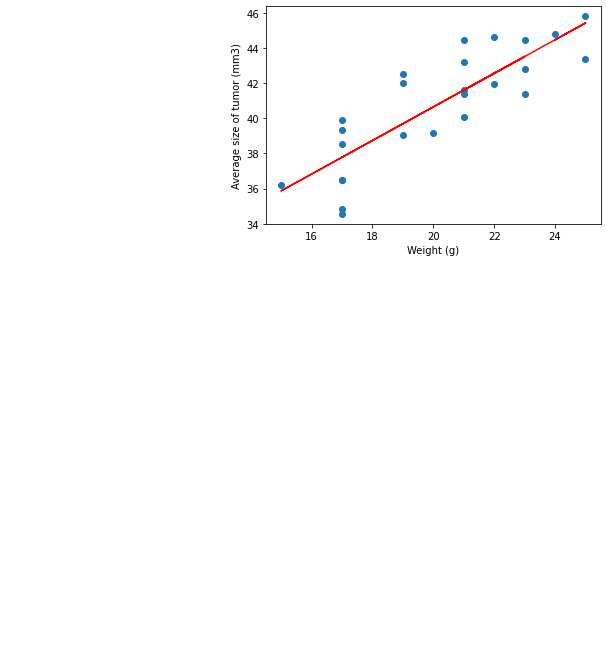

In [23]:
#Calculating the correlation coefficient and linear regression model 
correlation = st.pearsonr(weight_axis,tumor_data)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(weight_axis,tumor_data)
regress_values=weight_axis*slope+intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_axis,tumor_data)
plt.plot(weight_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average size of tumor (mm3)")
plt.show()